# Advances House Price Prediction using PyTorch

### Importing Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn

In [79]:
# importing datasets
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Pytorch-Tutorial/master/houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [80]:
# exploring the data
def exp_data(data):
    print("Shape of the data: ")
    print(df.shape)
    print("-"*80)
    print("Columns in the data: ")
    print(df.columns)
    print("-"*80)
    print("Information of the data: ")
    print(df.info())
    print("-"*80)
    print("Description of the data: ")
    print(df.describe())
    print("-"*80)
    print("Top 5 records: ")
    print(df.head(5))
    
    
# calling the function
exp_data(df)

Shape of the data: 
(1201, 10)
--------------------------------------------------------------------------------
Columns in the data: 
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'SalePrice'],
      dtype='object')
--------------------------------------------------------------------------------
Information of the data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-nu

In [81]:
# Unique values in the column name
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [82]:
import datetime
datetime.datetime.now().year

2022

In [83]:
# Total years
df['Total Years'] = datetime.datetime.now().year-df['YearBuilt']

In [84]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,19
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,46
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,21
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,107
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,22


In [85]:
df.drop("YearBuilt", axis=1,inplace=True)

In [86]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [87]:
cat_features = ['MSSubClass', 'MSZoning', 'Street', 'LotShape']
out_feature = 'SalePrice'

In [88]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85])

In [89]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = {}
lbl_encoder['MSSubClass'] = LabelEncoder()
lbl_encoder['MSSubClass'].fit_transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0])

In [90]:
lbl_encoder

{'MSSubClass': LabelEncoder()}

In [91]:
#mfor every category
lbl_encoders = {}
for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    df[feature] = lbl_encoders[feature].fit_transform(df[feature])

In [92]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,19
1,0,3,80.0,9600,1,3,1262,0,181500,46
2,5,3,68.0,11250,1,0,920,866,223500,21
3,6,3,60.0,9550,1,0,961,756,140000,107
4,5,3,84.0,14260,1,0,1145,1053,250000,22
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,23
1456,0,3,85.0,13175,1,3,2073,0,210000,44
1457,6,3,66.0,9042,1,3,1188,1152,266500,81
1458,0,3,68.0,9717,1,3,1078,0,142125,72


In [93]:
# stacking and converting into tensors
cat_features = np.stack([df['MSSubClass'], df['MSZoning'], df['Street'], df['LotShape']],1)

In [94]:
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [95]:
## convert numpy into tensorws
cat_features = torch.tensor(cat_features, dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [96]:
## create continous variable
cont_features = []
for i in df.columns:
    if i in ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'SalePrice']:
        pass
    else:
        cont_features.append(i)

In [97]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [98]:
## stacking continous variable to a tensor
cont_values = np.stack([df[i].values for i in cont_features], axis=1)
cont_values = torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    19.],
        [   80.,  9600.,  1262.,     0.,    46.],
        [   68., 11250.,   920.,   866.,    21.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    81.],
        [   68.,  9717.,  1078.,     0.,    72.],
        [   75.,  9937.,  1256.,     0.,    57.]])

In [99]:
cont_values.dtype

torch.float32

In [100]:
### dependent feature
y = torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [102]:
df.shape

(1201, 10)

In [103]:
cat_features.shape, cont_values.shape, y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [104]:
len(df['MSSubClass'].unique())

15

## Embedding Layers ---> Categorical Features

In [105]:
cat_dims = [len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [106]:
cat_dims

[15, 5, 2, 4]

In [107]:
##### output dimension should be setbased on the input dimension(min(50,feature dimension/2))
embedding_dim = [(x, min(50, (x+1)//2)) for x in cat_dims]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

 Should not be greater than `50`

In [108]:
## above outputs looks like
(15+1)//2

8

# Model training using PyTorch

In [109]:
import torch.nn.functional as f
embed_repr = nn.ModuleList([nn.Embedding(inp,out) for inp, out in embedding_dim])
embed_repr

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [110]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [111]:
cat_featuresz = cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [128]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_repr):
    embedding_val.append(e(cat_features[:,i]))

In [129]:
embedding_val

[tensor([[-1.9793, -0.0901, -0.8985,  ..., -0.7198, -1.2037,  0.3494],
         [ 0.3159,  0.5459, -2.0745,  ..., -1.5762, -0.7999, -1.1375],
         [-1.9793, -0.0901, -0.8985,  ..., -0.7198, -1.2037,  0.3494],
         ...,
         [-0.4923, -0.4153, -0.8417,  ..., -1.0691,  0.3482,  1.8118],
         [ 0.3159,  0.5459, -2.0745,  ..., -1.5762, -0.7999, -1.1375],
         [ 0.3159,  0.5459, -2.0745,  ..., -1.5762, -0.7999, -1.1375]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.3749, -0.3629,  0.0708],
         [ 1.3749, -0.3629,  0.0708],
         [ 1.3749, -0.3629,  0.0708],
         ...,
         [ 1.3749, -0.3629,  0.0708],
         [ 1.3749, -0.3629,  0.0708],
         [ 1.3749, -0.3629,  0.0708]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.2052],
         [-0.2052],
         [-0.2052],
         ...,
         [-0.2052],
         [-0.2052],
         [-0.2052]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.9169, -0.6593],
         [ 0.9169, -0.6593],
         [ 1.0195,  0.

#### stacking the above result

In [130]:
z = torch.cat(embedding_val,1)
z

tensor([[-1.9793, -0.0901, -0.8985,  ..., -0.2052,  0.9169, -0.6593],
        [ 0.3159,  0.5459, -2.0745,  ..., -0.2052,  0.9169, -0.6593],
        [-1.9793, -0.0901, -0.8985,  ..., -0.2052,  1.0195,  0.2138],
        ...,
        [-0.4923, -0.4153, -0.8417,  ..., -0.2052,  0.9169, -0.6593],
        [ 0.3159,  0.5459, -2.0745,  ..., -0.2052,  0.9169, -0.6593],
        [ 0.3159,  0.5459, -2.0745,  ..., -0.2052,  0.9169, -0.6593]],
       grad_fn=<CatBackward0>)

In [131]:
## Dropout layer
dropout = nn.Dropout(.4)

In [132]:
final_embed = dropout(z)
final_embed

tensor([[-0.0000, -0.1502, -1.4975,  ..., -0.3420,  1.5282, -0.0000],
        [ 0.5265,  0.9098, -3.4576,  ..., -0.0000,  1.5282, -1.0989],
        [-3.2988, -0.1502, -1.4975,  ..., -0.3420,  0.0000,  0.3564],
        ...,
        [-0.8205, -0.0000, -0.0000,  ..., -0.0000,  0.0000, -1.0989],
        [ 0.5265,  0.0000, -3.4576,  ..., -0.0000,  1.5282, -0.0000],
        [ 0.5265,  0.9098, -0.0000,  ..., -0.3420,  0.0000, -0.0000]],
       grad_fn=<MulBackward0>)

- Some of the values becomes 0 using Dropout layer to avoid overfitting

In [133]:
## feed forward neural network
import torch
import torch.nn as nn


class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [134]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim,len(cont_features),1,[100,50], p=0.4)

In [135]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

### Loss and Optimizer

In [136]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [137]:
df.shape

(1201, 10)

In [138]:
model.parameters

<bound method Module.parameters of FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [139]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    19.],
        [   80.,  9600.,  1262.,     0.,    46.],
        [   68., 11250.,   920.,   866.,    21.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    81.],
        [   68.,  9717.,  1078.,     0.,    72.],
        [   75.,  9937.,  1256.,     0.,    57.]])

In [140]:
cont_values.shape

torch.Size([1201, 5])

In [141]:
batch_size = 1200
test_size = int(batch_size*0.15)
train_categorical = cat_features[:batch_size-test_size]
test_categorical = cat_features[batch_size-test_size:batch_size]
train_cont = cont_values[:batch_size-test_size]
test_cont = cont_values[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [142]:
len(train_categorical), len(test_categorical), len(train_cont), len(test_cont), len(y_train), len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [144]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.78125
Epoch number: 11 and the loss : 200493.625
Epoch number: 21 and the loss : 200489.0
Epoch number: 31 and the loss : 200482.515625
Epoch number: 41 and the loss : 200473.6875
Epoch number: 51 and the loss : 200461.859375
Epoch number: 61 and the loss : 200447.15625
Epoch number: 71 and the loss : 200428.5
Epoch number: 81 and the loss : 200407.375
Epoch number: 91 and the loss : 200383.71875
Epoch number: 101 and the loss : 200354.0625
Epoch number: 111 and the loss : 200324.1875
Epoch number: 121 and the loss : 200290.203125
Epoch number: 131 and the loss : 200251.015625
Epoch number: 141 and the loss : 200207.578125
Epoch number: 151 and the loss : 200157.40625
Epoch number: 161 and the loss : 200115.078125
Epoch number: 171 and the loss : 200067.3125
Epoch number: 181 and the loss : 200002.328125
Epoch number: 191 and the loss : 199939.9375
Epoch number: 201 and the loss : 199873.328125
Epoch number: 211 and the loss : 199812.703125
Epoch n

In [148]:
type(range(epochs))

range

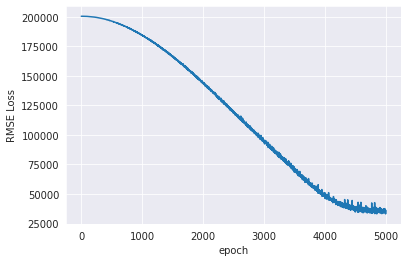

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
fi_loss = [fl.item() for fl in final_losses]
plt.plot(range(epochs), fi_loss)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [151]:
## Validate the test data
y_pred =""
with torch.no_grad():
    y_pred = model(test_categorical, test_cont)
    loss = torch.sqrt(loss_function(y_pred, y_test))
print('RMSE: {}'.format(loss))

RMSE: 44885.2890625


In [152]:
data_verify = pd.DataFrame(y_test.tolist(), columns=["Test"])
data_predicted = pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [154]:
# data_predicted

In [155]:
final_output = pd.concat([data_verify, data_predicted],axis=1)
final_output['Difference'] = final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,141486.125000,-11486.125000
1,138887.0,189391.437500,-50504.437500
2,175500.0,120932.687500,54567.312500
3,195000.0,245629.421875,-50629.421875
4,142500.0,144191.625000,-1691.625000


In [156]:
## sacve the pytorch model
torch.save(model,'HousePrice.pt')
torch.save(model.state_dict(),'HouseWeights.pt')

In [157]:
## Loading the saved model
embs_size = [(15,8),(5,3),(2,1),(4,2)]
model1 = FeedForwardNN(embs_size, 5,1,[100,50],p=0.4)
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [158]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

## The End